# Netflix Stock Market Price Prediction(with data of 2018 - 2022) Using LSTM 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
df1 = df.reset_index()['Close']

In [6]:
df1.shape

(1009,)

In [7]:
df1

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

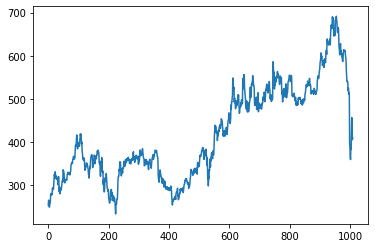

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [9]:
import numpy as np

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

Splitting dataset into train and test split

In [12]:
training_size = int(len(df1)*0.65) # training size 65%
test_size = len(df1) - training_size # test size 35%
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(655, 354)

In [14]:
len(train_data), len(test_data)

(655, 354)

In [15]:
train_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       [0.03542955],
       [0.03405342],
       [0.05257641],
       [0.05327534],
       [0.0701601 ],
       [0.10133021],
       [0.09750767],
       [0.09757319],
       [0.10301218],
       [0.09667768],
       [0.11369343],
       [0.13167034],
       [0.12391599],
       [0.12559796],
       [0.12343551],
       [0.14672022],
       [0.1771914 ],
       [0.19951508],
       [0.19064677],
       [0.18156003],
       [0.2131015 ],
       [0.19095254],
       [0.17911361],
       [0.19149862],
       [0.19049385],
       [0.18472731],
       [0.17387127],
       [0.18265218],
       [0.18042421],
       [0.15906164],
       [0.14647998],
       [0.18887749],
       [0.1459339 ],
       [0.11334393],
       [0.13426968],
       [0.10137394],
       [0.10875693],
       [0.12026823],
       [0.13125532],
       [0.12007165],
       [0.12243068],
       [0.14021101],
       [0.15244317],
       [0.16463161],
       [0.169

In [16]:
test_data

array([[0.54203708],
       [0.52943362],
       [0.57253006],
       [0.54603434],
       [0.51619669],
       [0.51567241],
       [0.55365764],
       [0.56200172],
       [0.5170922 ],
       [0.52248746],
       [0.54389376],
       [0.56086584],
       [0.56704748],
       [0.5813547 ],
       [0.64137963],
       [0.58797317],
       [0.62639528],
       [0.59411108],
       [0.65699738],
       [0.65072841],
       [0.66743845],
       [0.66824664],
       [0.69943868],
       [0.67182894],
       [0.67289924],
       [0.6485441 ],
       [0.64839118],
       [0.63681436],
       [0.55737093],
       [0.54902691],
       [0.55568903],
       [0.55560164],
       [0.55710882],
       [0.55123302],
       [0.59048511],
       [0.52829774],
       [0.54660228],
       [0.55337367],
       [0.57462705],
       [0.61134533],
       [0.61346405],
       [0.51685196],
       [0.53812714],
       [0.56110615],
       [0.5523907 ],
       [0.54380637],
       [0.53563706],
       [0.538

Now convert the array values into dataset matrices

In [17]:
import numpy
def create_dataset(dataset,time_steps=1):
    dat_X, dat_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dat_X.append(a)
        dat_Y.append(dataset[i + time_step, 0])
    return numpy.array(dat_X), numpy.array(dat_Y)

Then, reshape the X & Y datas as X=t,t+1,t+2,t+3 and Y=t+4

In [18]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(Y_train.shape)

(554, 100)
(554,)


(None, None)

In [20]:
print(X_test.shape), print(Y_test.shape)

(253, 100)
(253,)


(None, None)

Reshape input to be (samples, time steps, features) which is needed for LSTM

In [21]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

# CREATING LSTM MODEL

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 9s 334ms/step - loss: 0.0404 - val_loss: 0.0104
Epoch 2/100
9/9 [==============================] - 2s 216ms/step - loss: 0.0091 - val_loss: 0.0761
Epoch 3/100
9/9 [==============================] - 2s 221ms/step - loss: 0.0071 - val_loss: 0.0110
Epoch 4/100
9/9 [==============================] - 2s 206ms/step - loss: 0.0045 - val_loss: 0.0208
Epoch 5/100
9/9 [==============================] - 2s 223ms/step - loss: 0.0035 - val_loss: 0.0080
Epoch 6/100
9/9 [==============================] - 2s 221ms/step - loss: 0.0028 - val_loss: 0.0078
Epoch 7/100
9/9 [==============================] - 2s 212ms/step - loss: 0.0028 - val_loss: 0.0084
Epoch 8/100
9/9 [==============================] - 2s 220ms/step - loss: 0.0026 - val_loss: 0.0082
Epoch 9/100
9/9 [==============================] - 2s 232ms/step - loss: 0.0026 - val_loss: 0.0066
Epoch 10/100
9/9 [==============================] - 2s 227ms/step - loss: 0.0025 - val_loss: 0.0061
Epoch 11/

In [178]:
import tensorflow as tf

In [179]:
tf.__version__

'2.9.0'

Prediction and check performance metrics

In [180]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

8/8 [==============================] - 0s 17ms/step


Transform back to original form

In [181]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

Calculate RMSE(Root-Mean-Sqaured-Error) performance metrics

In [182]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

361.52561344729406

Test Data RMSE

In [183]:
math.sqrt(mean_squared_error(Y_test,test_predict))

553.5294772571766

# Plotting

Shift train predictions for plotting

In [184]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

Shift test predictions for plotting

In [185]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

Plot baseline and predictions

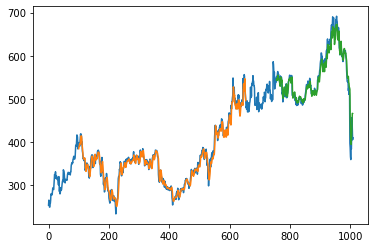

In [186]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [187]:
len(test_data)

354

In [188]:
X_input = test_data[254:].reshape(1,-1)
X_input.shape

(1, 100)

In [189]:
temp_input = list(X_input)
temp_input = temp_input[0].tolist()

In [190]:
temp_input

[0.7623031220089325,
 0.770232186519946,
 0.7764574241046989,
 0.7460518342503559,
 0.741049807175792,
 0.779297134920363,
 0.7849981594001756,
 0.7830978186350088,
 0.7836438967059076,
 0.7644437065449226,
 0.797667144433283,
 0.8223062503372986,
 0.8284441613012656,
 0.8070377960750383,
 0.8757563085718285,
 0.8851269602135838,
 0.8692906961575151,
 0.8710599825542908,
 0.8587841584420446,
 0.8541971550699885,
 0.8647255577514177,
 0.8735501313222742,
 0.8615145487965392,
 0.8826586764115594,
 0.884908581408719,
 0.854634045922767,
 0.9158383843680022,
 0.9412202154248719,
 0.9562481616145222,
 0.9493895237067091,
 0.9371572940990189,
 0.9614687007370002,
 0.9969856403113886,
 0.9770209932746399,
 0.9694850896844873,
 0.9925732858122798,
 0.9491274149699269,
 0.8995870966094257,
 0.9121032955512327,
 0.9220200252638868,
 0.9021864325955293,
 0.9254931407712357,
 0.9801664073316425,
 0.9730019329394415,
 0.9906293483582447,
 1.0,
 0.9788777395352508,
 0.9718441840840797,
 0.9290317157

# Demonstrate prediction for next 10 days

In [191]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        X_input = np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input = X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(X_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}.".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1
        
print(lst_output)

[0.4103593]
101
1 day input [0.77023219 0.77645742 0.74605183 0.74104981 0.77929713 0.78499816
 0.78309782 0.7836439  0.76444371 0.79766714 0.82230625 0.82844416
 0.8070378  0.87575631 0.88512696 0.8692907  0.87105998 0.85878416
 0.85419716 0.86472556 0.87355013 0.86151455 0.88265868 0.88490858
 0.85463405 0.91583838 0.94122022 0.95624816 0.94938952 0.93715729
 0.9614687  0.99698564 0.97702099 0.96948509 0.99257329 0.94912741
 0.8995871  0.9121033  0.92202003 0.90218643 0.92549314 0.98016641
 0.97300193 0.99062935 1.         0.97887774 0.97184418 0.92903172
 0.91780432 0.92704392 0.94309869 0.93916696 0.89124314 0.83853568
 0.83569596 0.804373   0.82743933 0.85559515 0.86105593 0.82374784
 0.82518942 0.80968086 0.79532991 0.81072929 0.78019265 0.77073453
 0.78604659 0.81046718 0.83082499 0.83049742 0.82837857 0.82311443
 0.82274301 0.8261288  0.80505013 0.79397565 0.78038929 0.72877398
 0.69769113 0.67097703 0.66833397 0.67049655 0.66258921 0.623228
 0.63740416 0.60487972 0.61593233 0.

14 day output [[0.6296149]].
15 day input [0.88512696 0.8692907  0.87105998 0.85878416 0.85419716 0.86472556
 0.87355013 0.86151455 0.88265868 0.88490858 0.85463405 0.91583838
 0.94122022 0.95624816 0.94938952 0.93715729 0.9614687  0.99698564
 0.97702099 0.96948509 0.99257329 0.94912741 0.8995871  0.9121033
 0.92202003 0.90218643 0.92549314 0.98016641 0.97300193 0.99062935
 1.         0.97887774 0.97184418 0.92903172 0.91780432 0.92704392
 0.94309869 0.93916696 0.89124314 0.83853568 0.83569596 0.804373
 0.82743933 0.85559515 0.86105593 0.82374784 0.82518942 0.80968086
 0.79532991 0.81072929 0.78019265 0.77073453 0.78604659 0.81046718
 0.83082499 0.83049742 0.82837857 0.82311443 0.82274301 0.8261288
 0.80505013 0.79397565 0.78038929 0.72877398 0.69769113 0.67097703
 0.66833397 0.67049655 0.66258921 0.623228   0.63740416 0.60487972
 0.61593233 0.59930975 0.35739716 0.33478952 0.28950877 0.27483019
 0.33380662 0.32869527 0.42214021 0.48764772 0.4272515  0.37509011
 0.38507243 0.41035929 0

28 day input [0.95624816 0.94938952 0.93715729 0.9614687  0.99698564 0.97702099
 0.96948509 0.99257329 0.94912741 0.8995871  0.9121033  0.92202003
 0.90218643 0.92549314 0.98016641 0.97300193 0.99062935 1.
 0.97887774 0.97184418 0.92903172 0.91780432 0.92704392 0.94309869
 0.93916696 0.89124314 0.83853568 0.83569596 0.804373   0.82743933
 0.85559515 0.86105593 0.82374784 0.82518942 0.80968086 0.79532991
 0.81072929 0.78019265 0.77073453 0.78604659 0.81046718 0.83082499
 0.83049742 0.82837857 0.82311443 0.82274301 0.8261288  0.80505013
 0.79397565 0.78038929 0.72877398 0.69769113 0.67097703 0.66833397
 0.67049655 0.66258921 0.623228   0.63740416 0.60487972 0.61593233
 0.59930975 0.35739716 0.33478952 0.28950877 0.27483019 0.33380662
 0.32869527 0.42214021 0.48764772 0.4272515  0.37509011 0.38507243
 0.41035929 0.40667322 0.41664112 0.43239209 0.45206833 0.47461033
 0.49879792 0.52329266 0.5467875  0.56815463 0.58658403 0.60169083
 0.61354822 0.62262267 0.62961489 0.63524455 0.64003855 0

In [192]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [193]:
import matplotlib.pyplot as plt

In [194]:
len(df1)

1009

In [195]:
df3 = df1.tolist()
df3.extend(lst_output)

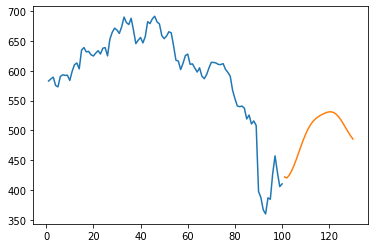

In [196]:
plt.plot(day_new,scaler.inverse_transform(df1[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

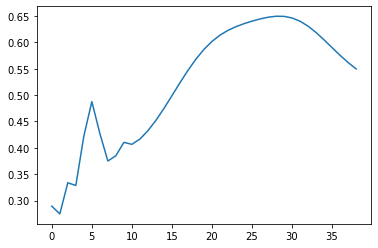

In [198]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])